# Background

The data was obtained from Kaggle (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) with a CC0: Public Domain license. The data was inspected, features were created/modified and outliers removed. The created features/modified were:

Created:
- Customer Age
- Total Expenses
- Seniority
- Child Count (Number of Children)
- Has Child (Boolean for children)

Modified:
- Marital Status
- Education

Outliers were removed using scatterplots and boxplots with visual inspection. The prepared data was pickled along with the features to be used for clustering in a list.

# Goal

Explore correlations

# Imports

In [1]:
# data tools
import numpy as np
import pandas as pd
import pickle as pkl


# inspection tools
# from IPython.core.display import HTML
# from dataprep.eda import plot, plot_correlation, create_report, plot_missing

# date handling
# import datetime
# from datetime import date

# graphing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
sns.set()

# machine learning
# from sklearn.preprocessing import StandardScaler, normalize
# from sklearn import metrics
# from sklearn.mixture import GaussianMixture
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# import warnings
# warnings.filterwarnings('ignore')

# Load Data

In [2]:
with open('customer_data_without_outliers.pickle', 'rb') as handle:
    dict = pkl.load(handle)

In [3]:
# Unpack the data
data = dict['data']
features = dict['cluster_features']

#  Select clustering features
segm_data = data[features].copy()
segm_data

,Education,Marital_Status,Income,Recency,Customer_Age,Total_Expenses,Seniority,Child_Count,Has_child
ID,,,,,,,,,
5524,Postgraduate,Alone,58138.0,58,57,1617,25.333333,0,No child
2174,Postgraduate,Alone,46344.0,38,60,27,7.000000,2,Has child
4141,Postgraduate,Couple,71613.0,26,49,776,13.633333,0,No child
6182,Postgraduate,Couple,26646.0,26,30,53,7.866667,1,Has child
5324,Postgraduate,Couple,58293.0,94,33,422,8.600000,1,Has child
...,...,...,...,...,...,...,...,...,...
10870,Postgraduate,Couple,61223.0,46,47,1341,15.933333,1,Has child
4001,Postgraduate,Couple,64014.0,56,68,444,3.866667,3,Has child
7270,Postgraduate,Alone,56981.0,91,33,1241,8.400000,0,No child


In [4]:
# replace boolean versions for children, marital and education

segm_data_temp = segm_data.replace({'Postgraduate': 1,
                               'Undergraduate': 0,
                                'Alone': 0,
                                'Couple': 1,
                                'Has child': 1,
                                'No child': 0})
segm_data_temp

,Education,Marital_Status,Income,Recency,Customer_Age,Total_Expenses,Seniority,Child_Count,Has_child
ID,,,,,,,,,
5524,1,0,58138.0,58,57,1617,25.333333,0,0
2174,1,0,46344.0,38,60,27,7.000000,2,1
4141,1,1,71613.0,26,49,776,13.633333,0,0
6182,1,1,26646.0,26,30,53,7.866667,1,1
5324,1,1,58293.0,94,33,422,8.600000,1,1
...,...,...,...,...,...,...,...,...,...
10870,1,1,61223.0,46,47,1341,15.933333,1,1
4001,1,1,64014.0,56,68,444,3.866667,3,1
7270,1,0,56981.0,91,33,1241,8.400000,0,0


# Pearson Correlation

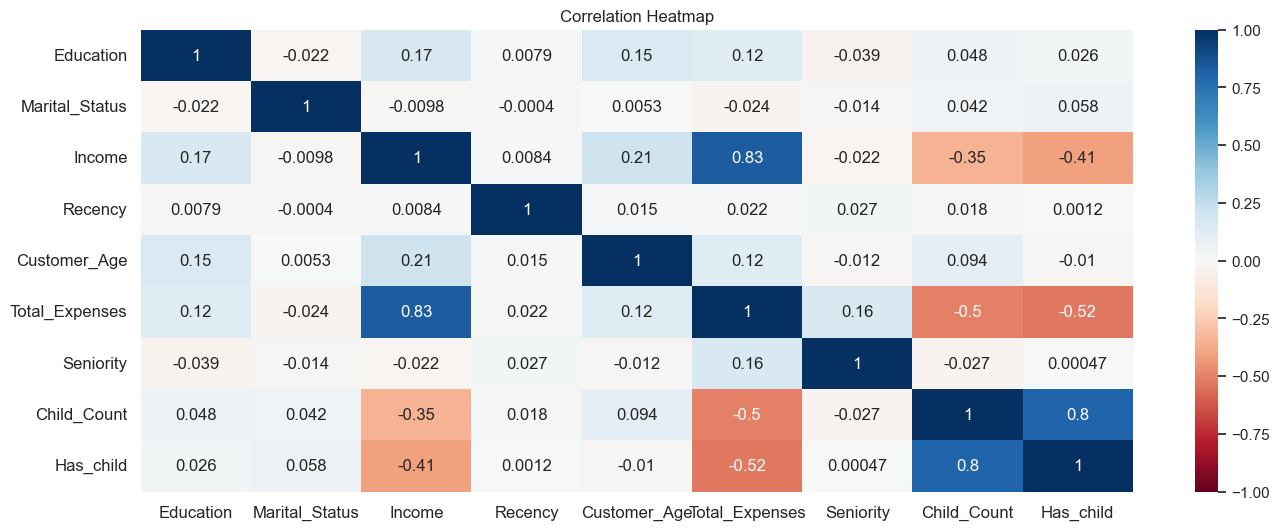

In [5]:
plt.figure(figsize=(16,6))
s = sns.heatmap(segm_data_temp.corr(numeric_only=True),
               annot=True,
               cmap='RdBu',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation=0, fontsize = 12)
plt.title("Correlation Heatmap")
plt.show()

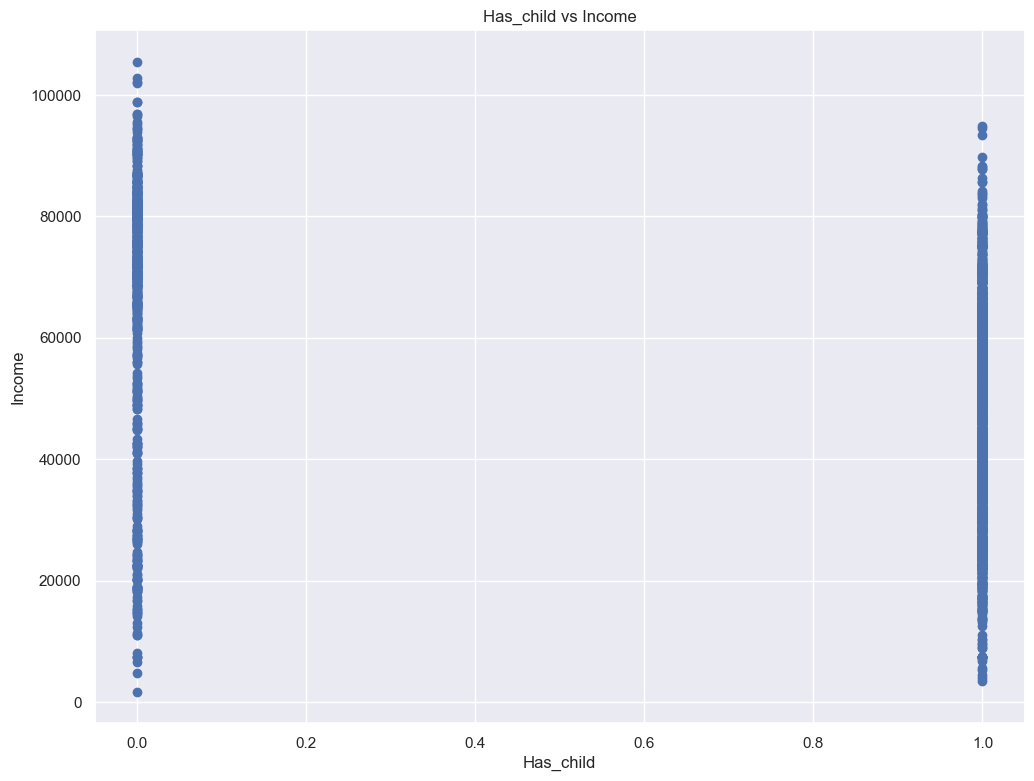

In [6]:
x = 'Has_child'
y = 'Income'
title = x + ' vs ' + y

plt.figure(figsize=(12, 9))
plt.scatter(segm_data_temp.loc[:, x], segm_data_temp.loc[:, y])

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

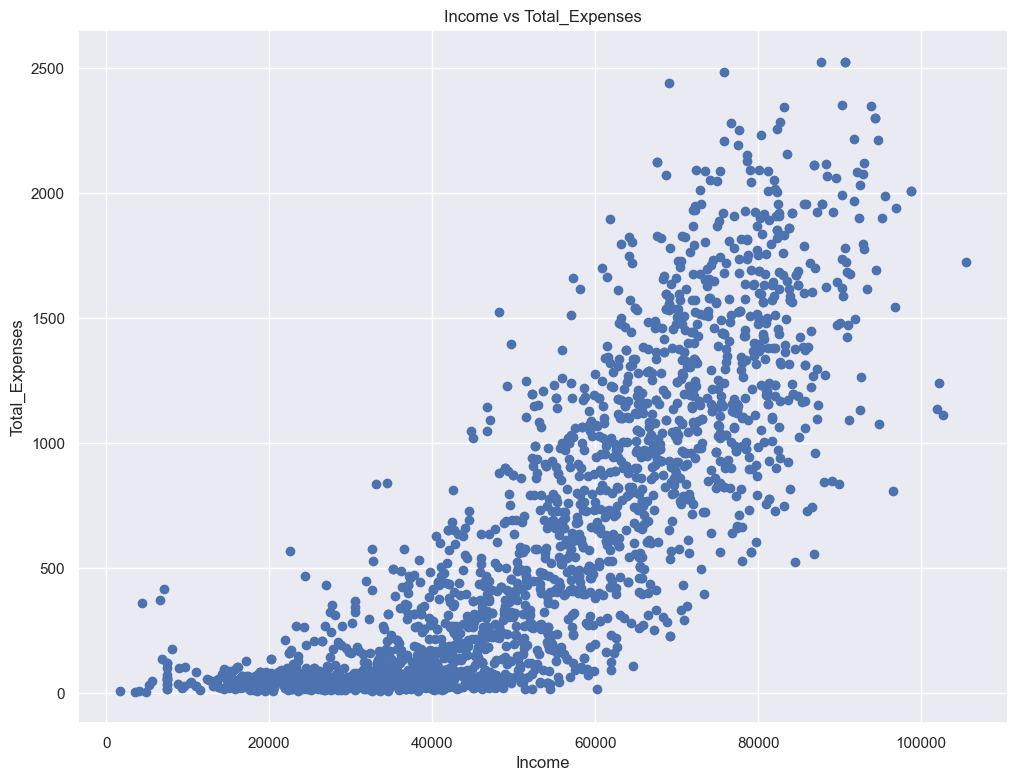

In [7]:
x = 'Income'
y = 'Total_Expenses'
title = x + ' vs ' + y

plt.figure(figsize=(12, 9))
plt.scatter(segm_data_temp.loc[:, x], segm_data_temp.loc[:, y])

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

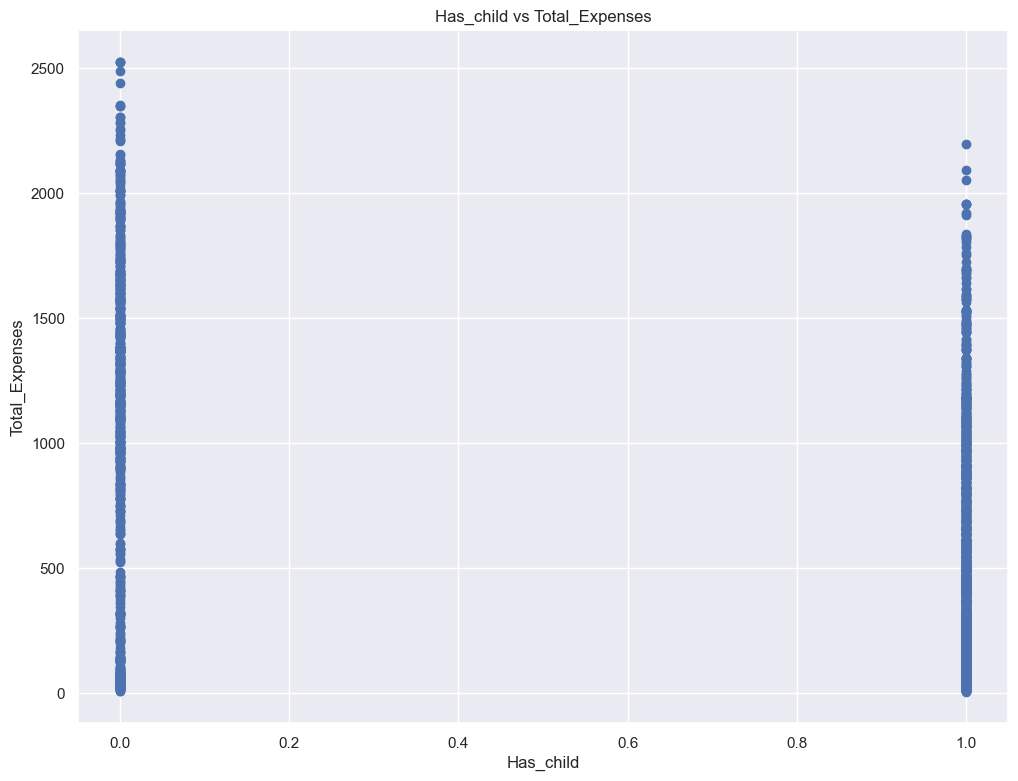

In [8]:
x = 'Has_child'
y = 'Total_Expenses'
title = x + ' vs ' + y

plt.figure(figsize=(12, 9))
plt.scatter(segm_data_temp.loc[:, x], segm_data_temp.loc[:, y])

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

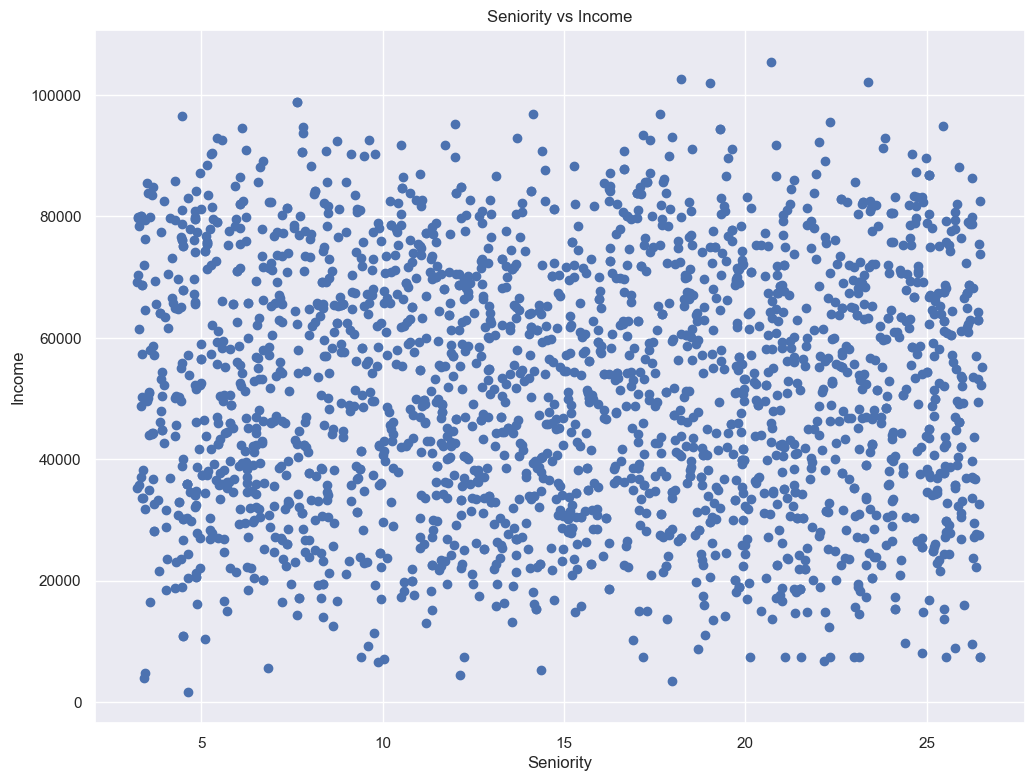

In [9]:
x = 'Seniority'
y = 'Income'
title = x + ' vs ' + y

plt.figure(figsize=(12, 9))
plt.scatter(segm_data_temp.loc[:, x], segm_data_temp.loc[:, y])

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

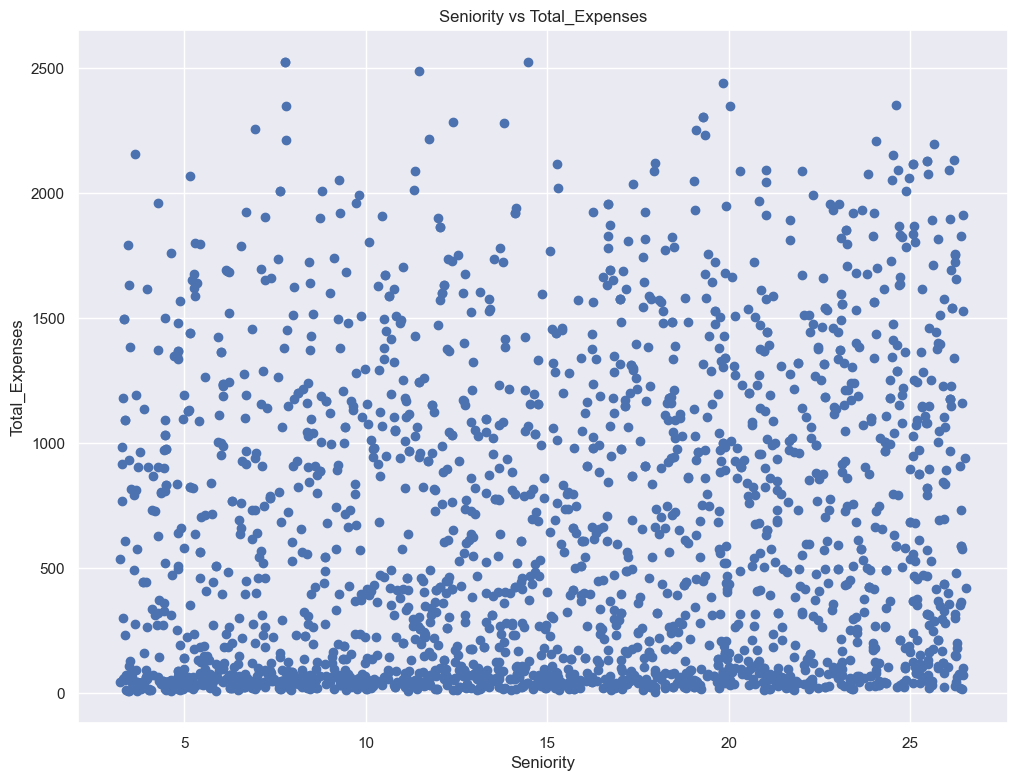

In [10]:
x = 'Seniority'
y = 'Total_Expenses'
title = x + ' vs ' + y

plt.figure(figsize=(12, 9))
plt.scatter(segm_data_temp.loc[:, x], segm_data_temp.loc[:, y])

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

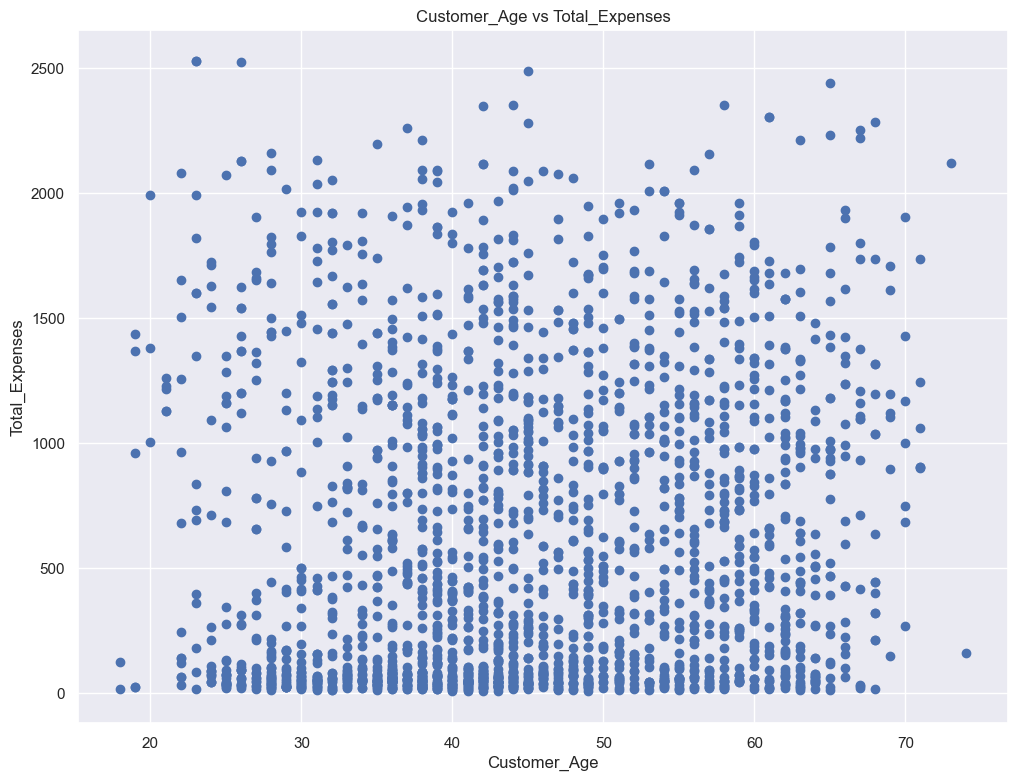

In [11]:
x = 'Customer_Age'
y = 'Total_Expenses'
title = x + ' vs ' + y

plt.figure(figsize=(12, 9))
plt.scatter(segm_data_temp.loc[:, x], segm_data_temp.loc[:, y])

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

# Results

According the Pearson correlations, only the Income vs Expenses are correlated positively (+0.83). Two sets are negativly correlated, namely Children vs Income (-0.35) and Children vs Expenses (-0.5). The rest show little to no correlation and should be easy to segment individually. PCA might be useful to help reduce dimensions with the non-correlated sets.

